<a href="https://colab.research.google.com/github/Shreeja7Sheth/Car-Data-Analytics/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analytics Project**

###**Task Description**: Examine the quality of the attached dataset. Use ML (Python) to find insights, hidden patterns, and forecast trends; anything related to financial and risk forecasting, as well as ideal customer profile (ICP).

## **LifeCycle of the project**
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd



In [126]:
#display all the columns in a dataframe (df)
pd.pandas.set_option('display.max_columns',None)

In [127]:
df=pd.read_csv("insurance_data_sample.csv")
print(df.shape)

(23906, 18)


In [128]:
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0,Riga
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900,Liepaja
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0,Riga
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0,Jelgava
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450,Liepaja


1. Data Analysis:


*   Missing Values
*   All the Numerical Variables
*   Distribution of the Numerical Variables
*   Categorical Variables
*   Cardinality of Categorical Variables
*   Outliers
*   Relationship between independent and dependent feature









###Data Analysis

In [129]:
df.describe()

,Annual Income,Price ($),Phone,Amount_paid_for_insurance,Claim amount
count,2.390600e+04,23906.000000,2.390600e+04,23906.000000,23906.000000
mean,8.308403e+05,28090.247846,7.497741e+06,1654.517778,282.463273
std,7.200064e+05,14788.687608,8.674920e+05,753.481664,977.506527
min,1.008000e+04,1200.000000,6.000101e+06,103.000000,0.000000
25%,3.860000e+05,18001.000000,6.746495e+06,1138.000000,0.000000
50%,7.350000e+05,23000.000000,7.496198e+06,1432.000000,0.000000
75%,1.175750e+06,34000.000000,8.248146e+06,1990.000000,0.000000
max,1.120000e+07,85800.000000,8.999579e+06,4762.000000,8560.000000


####Check for Missing values
Found 1 null value in Customer Name

In [130]:
df.isnull().sum()

Car_id                       0
Date                         0
Customer Name                1
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64

####Find the column with the missing value and replace it with a valid value

In [131]:
null_data = df[df.isnull().any(axis=1)]
null_data
df['Customer Name'] = df['Customer Name'].fillna('Bob')
df.loc[[7564]]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
7564,C_CND_007565,11/05/2022,Bob,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÃ‚Â Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,2638,0,Liepaja


####No Null values

In [132]:
df.isnull().sum()

Car_id                       0
Date                         0
Customer Name                0
Gender                       0
Annual Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price ($)                    0
Dealer_No                    0
Body Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim amount                 0
City                         0
dtype: int64

Temporal Variables(Eg: Datetime Variables)


In [133]:
# storing year information
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['year']

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
23901    2023
23902    2023
23903    2023
23904    2023
23905    2023
Name: year, Length: 23906, dtype: int32

Text(0.5, 1.0, 'Car Price vs YearSold')

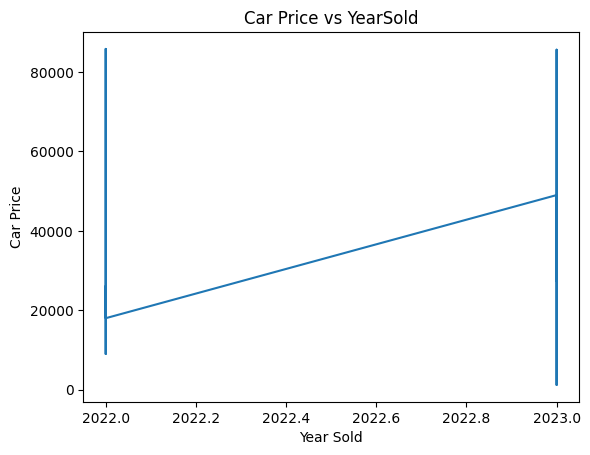

In [134]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the car is sold and the sales price

# df.groupby('year')['Price ($)'].median().plot()
plt.plot(df['year'],df['Price ($)'])
plt.xlabel('Year Sold')
plt.ylabel('Car Price')
plt.title("Car Price vs YearSold")


In [135]:
df.dtypes


Car_id                               object
Date                         datetime64[ns]
Customer Name                        object
Gender                               object
Annual Income                         int64
Dealer_Name                          object
Company                              object
Model                                object
Engine                               object
Transmission                         object
Color                                object
Price ($)                             int64
Dealer_No                            object
Body Style                           object
Phone                                 int64
Amount_paid_for_insurance             int64
Claim amount                          int64
City                                 object
year                                  int32
dtype: object

###Feature Engineering

In [136]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City,year
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0,Riga,2022
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900,Liepaja,2022
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0,Riga,2022
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0,Jelgava,2022
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450,Liepaja,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,692,1200,Tukums,2023
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÃ‚Â Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,1072,0,Liepaja,2023
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,1061,0,Liepaja,2023
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÃ‚Â Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,1922,3100,Tukums,2023


In [137]:
df.drop(['Car_id','Phone','Customer Name','Dealer_Name','Dealer_No ','Model','Company','Engine','Date'],axis='columns',inplace=True)


In [138]:
df.dtypes

Gender                       object
Annual Income                 int64
Transmission                 object
Color                        object
Price ($)                     int64
Body Style                   object
Amount_paid_for_insurance     int64
Claim amount                  int64
City                         object
year                          int32
dtype: object

In [139]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Annual Income: [  13500 1480000 1035000 ...  374060 4111000 1369000]
Transmission: ['Auto' 'Manual']
Color: ['Black' 'Red' 'Pale White']
Price ($): [26000 19000 31500 14000 24500 12000 42000 82000 15000 31000 46000  9000
 17000 18000 33000 21000 25000 22000 31250 41000 13000 20000 43000 16000
 61000 39000 42500 45001 36001 21001 29000 27000 25600 36000 31100 22600
 45000 62000 22700 49000 28000 22001 25001 12800 22500 46500 54000 16001
 38000 21200 71000 57001 62001 69001 20001 26750 24000 28501 15500 12500
 27250 11000 26500 69000 14150 60500 44000 11650 11800 27500 16900 14200
 51000 32000 39500 13500  9250 29500 18501 17001 23500 53000 60750 24001
 35000 18500 21500 41100 20200 59000 57000 25500 19100 10000 23000 11501
 24250 37000 54500 25100 34000 21900 29200 85000 43500 14500 16500 85600
 75000 71500 61500 19500 29001 60000 28001 60001 22100 21100 31001 36600
 53500 49300 17500 26001 23501  9200 22650 57500 39600 28100  9500 16700
 69500 18001 45500 1560

####One hot encoding for categorical columns



In [140]:
df2 = pd.get_dummies(data=df, columns=['Gender','Transmission','Color','Body Style','City'])
df2.replace({False: 0, True: 1}, inplace=True)
df2.columns

Index(['Annual Income', 'Price ($)', 'Amount_paid_for_insurance',
       'Claim amount', 'year', 'Gender_Female', 'Gender_Male',
       'Transmission_Auto', 'Transmission_Manual', 'Color_Black',
       'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
       'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
       'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
       'City_Riga', 'City_Tukums', 'City_Ventspils'],
      dtype='object')

In [141]:
df2.dtypes

Annual Income                int64
Price ($)                    int64
Amount_paid_for_insurance    int64
Claim amount                 int64
year                         int32
Gender_Female                int64
Gender_Male                  int64
Transmission_Auto            int64
Transmission_Manual          int64
Color_Black                  int64
Color_Pale White             int64
Color_Red                    int64
Body Style_Hardtop           int64
Body Style_Hatchback         int64
Body Style_Passenger         int64
Body Style_SUV               int64
Body Style_Sedan             int64
City_Daugavpils              int64
City_Jelgava                 int64
City_Liepaja                 int64
City_Riga                    int64
City_Tukums                  int64
City_Ventspils               int64
dtype: object

In [145]:
df2.columns

Index(['Annual Income', 'Price ($)', 'Amount_paid_for_insurance',
       'Claim amount', 'year', 'Gender_Female', 'Gender_Male',
       'Transmission_Auto', 'Transmission_Manual', 'Color_Black',
       'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
       'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
       'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
       'City_Riga', 'City_Tukums', 'City_Ventspils'],
      dtype='object')

In [142]:
df2.sample(5)

,Annual Income,Price ($),Amount_paid_for_insurance,Claim amount,year,Gender_Female,Gender_Male,Transmission_Auto,Transmission_Manual,Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan,City_Daugavpils,City_Jelgava,City_Liepaja,City_Riga,City_Tukums,City_Ventspils
12690,1460000,16000,1023,0,2023,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
17852,13500,24000,1398,0,2023,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
15608,472000,19000,1041,0,2023,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
14242,436000,36000,1928,3600,2023,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
17321,1100000,12000,602,0,2023,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


####Scaling

In [143]:
cols_to_scale = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance',
       'Claim amount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [144]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

Annual Income: [3.05632212e-04 1.31361082e-01 9.15931481e-02 ... 3.25274890e-02
 3.66483406e-01 1.21441440e-01]
Price ($): [0.29314421 0.21040189 0.35815603 0.15130024 0.27541371 0.12765957
 0.4822695  0.95508274 0.16312057 0.35224586 0.52955083 0.09219858
 0.18676123 0.19858156 0.37588652 0.23404255 0.28132388 0.24586288
 0.35520095 0.47044917 0.13947991 0.22222222 0.49408983 0.1749409
 0.70685579 0.44680851 0.48817967 0.51774232 0.41135934 0.23405437
 0.3286052  0.30496454 0.28841608 0.41134752 0.3534279  0.25295508
 0.5177305  0.71867612 0.25413712 0.56501182 0.31678487 0.2458747
 0.2813357  0.13711584 0.25177305 0.53546099 0.62411348 0.17495272
 0.43498818 0.23640662 0.8250591  0.65958629 0.71868794 0.80143026
 0.22223404 0.30200946 0.26950355 0.32270686 0.16903073 0.13356974
 0.30791962 0.11583924 0.29905437 0.80141844 0.15307329 0.70094563
 0.50591017 0.12352246 0.12529551 0.3108747  0.1855792  0.1536643
 0.58865248 0.36406619 0.45271868 0.14539007 0.09515366 0.33451537
 0.204503

###Feature Selection and Model Building

## **Forecasting**
Different Forecasting for this scenario:
1. Car Price Forecasting
2. Insurance Payment Forecasting
3. Claim Amount Forecasting

## **1. Car Price Forecasting**

**Objective**: Predict the price of a car based on various features.

**Target Variable**: Price ($)

**Features**: Annual Income, Amount_paid_for_insurance, Claim amount, year, Gender_Female, Gender_Male, Transmission_Auto, Transmission_Manual, Color_Black, Color_Pale White, Color_Red, Body Style_Hardtop, Body Style_Hatchback, Body Style_Passenger, Body Style_SUV, Body Style_Sedan, City_Daugavpils, City_Jelgava, City_Liepaja, City_Riga, City_Tukums, City_Ventspils.

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define features and target
features = ['Annual Income', 'Amount_paid_for_insurance',
       'Claim amount', 'year', 'Gender_Female', 'Gender_Male',
       'Transmission_Auto', 'Transmission_Manual', 'Color_Black',
       'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
       'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
       'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
       'City_Riga', 'City_Tukums', 'City_Ventspils']

target = 'Price ($)'

# Split the data
X = df2[features]
y = df2[target]

# print(X)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")


MAE: 0.022489347093292
MSE: 0.0008275615112514192
R2: 0.9723255676117797


In [149]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Save the DataFrame to a CSV file
results_df.to_csv('prediction_results.csv', index=False)

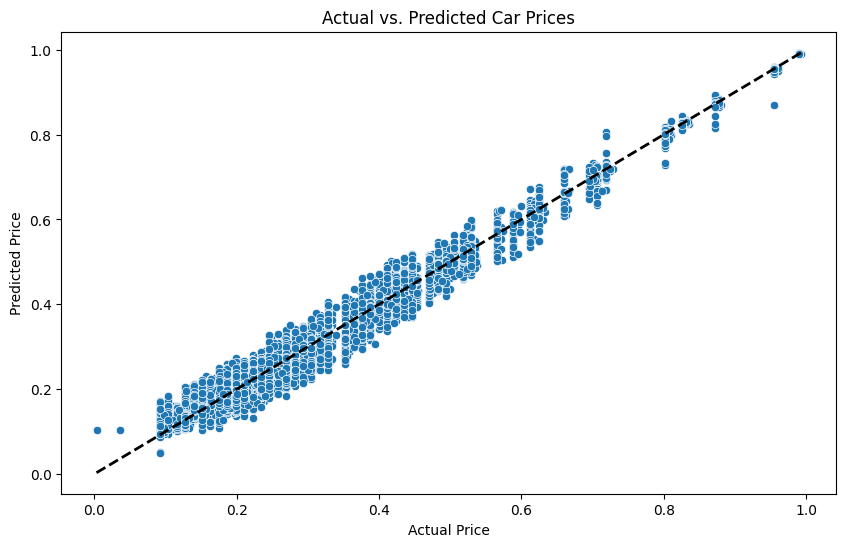

In [151]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df)
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         [results_df['Actual Price'].min(), results_df['Actual Price'].max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.show()

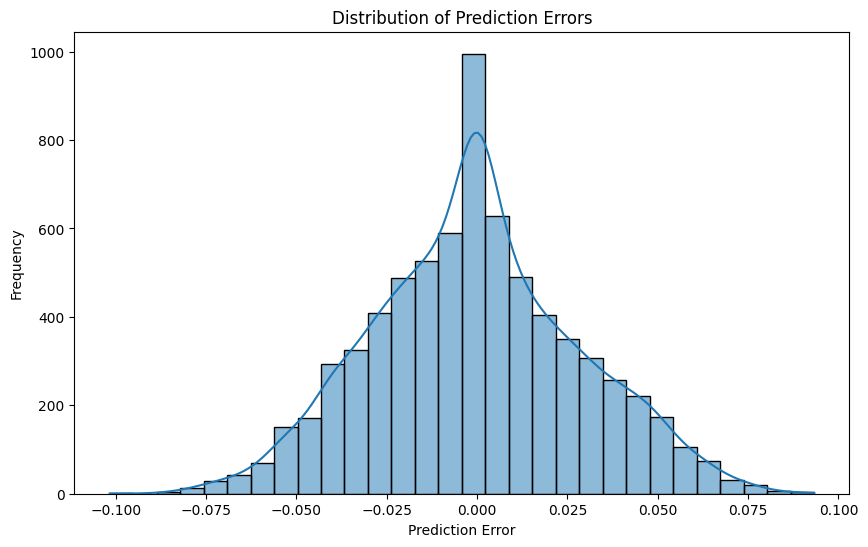

In [150]:
# Calculate prediction error
results_df['Prediction Error'] = results_df['Actual Price'] - results_df['Predicted Price']

# Distribution plot of prediction errors
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Prediction Error'], bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

## **2. Insurance Payment Forecasting**

**Objective**: Predict the amount a customer will pay for insurance based on car and customer attributes.

**Target Variable**: Amount_paid_for_insurance

**Features**: Annual Income, Price ($), Claim amount, year, Gender_Female, Gender_Male, Transmission_Auto, Transmission_Manual, Color_Black, Color_Pale White, Color_Red, Body Style_Hardtop, Body Style_Hatchback, Body Style_Passenger, Body Style_SUV, Body Style_Sedan, City_Daugavpils, City_Jelgava, City_Liepaja, City_Riga, City_Tukums, City_Ventspils

MAE: 0.028445716336736322
MSE: 0.0011214930873280555
R2: 0.9564329047841685


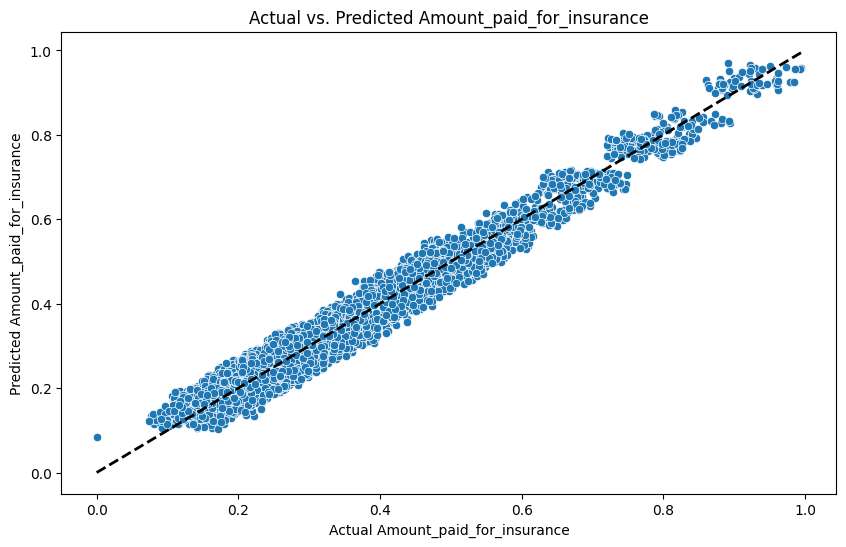

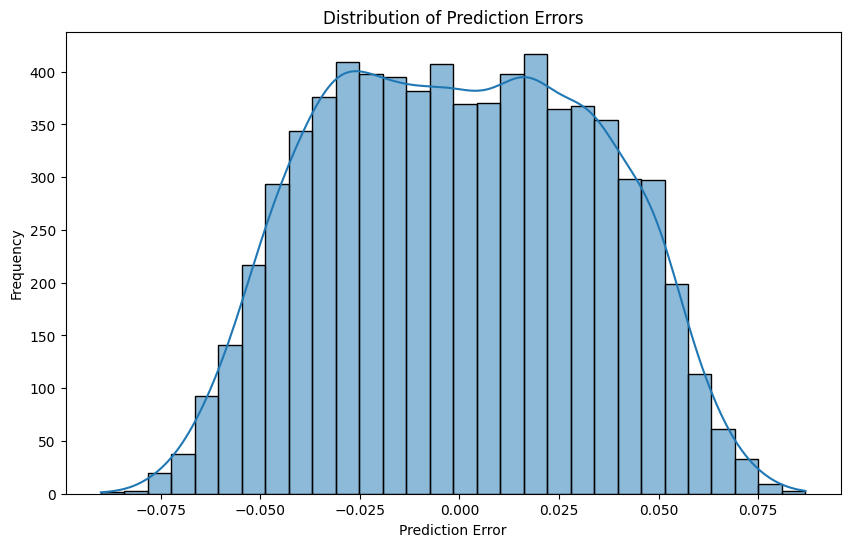

In [159]:
# Define features and target for insurance payment forecasting
features = ['Annual Income', 'Price ($)', 'Claim amount', 'year',
            'Gender_Female', 'Gender_Male', 'Transmission_Auto', 'Transmission_Manual',
            'Color_Black', 'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
            'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
            'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
            'City_Riga', 'City_Tukums', 'City_Ventspils']
target = 'Amount_paid_for_insurance'

# Split the data
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Amount_paid_for_insurance': y_test, 'Predicted Amount_paid_for_insurance': y_pred})

# Save the DataFrame to a CSV file
results_df.to_csv('insurance_claim_predictions.csv', index=False)

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Amount_paid_for_insurance', y='Predicted Amount_paid_for_insurance', data=results_df)
plt.plot([results_df['Actual Amount_paid_for_insurance'].min(), results_df['Actual Amount_paid_for_insurance'].max()],
         [results_df['Actual Amount_paid_for_insurance'].min(), results_df['Actual Amount_paid_for_insurance'].max()], 'k--', lw=2)
plt.xlabel('Actual Amount_paid_for_insurance')
plt.ylabel('Predicted Amount_paid_for_insurance')
plt.title('Actual vs. Predicted Amount_paid_for_insurance')
plt.show()

# Calculate prediction error
results_df['Prediction Error'] = results_df['Actual Amount_paid_for_insurance'] - results_df['Predicted Amount_paid_for_insurance']

# Distribution plot of prediction errors
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Prediction Error'], bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()



## **3. Claim Amount Forecasting**
**Objective**: Predict the amount of insurance claims based on customer and car characteristics.

**Target Variable**: Claim amount

**Features**: Annual Income, Price ($), Amount_paid_for_insurance, year, Gender_Female, Gender_Male, Transmission_Auto, Transmission_Manual, Color_Black, Color_Pale White, Color_Red, Body Style_Hardtop, Body Style_Hatchback, Body Style_Passenger, Body Style_SUV, Body Style_Sedan, City_Daugavpils, City_Jelgava, City_Liepaja, City_Riga, City_Tukums, City_Ventspils.

MAE: 0.0652820902788275
MSE: 0.014016910731194734
R2: -0.07237071675073992


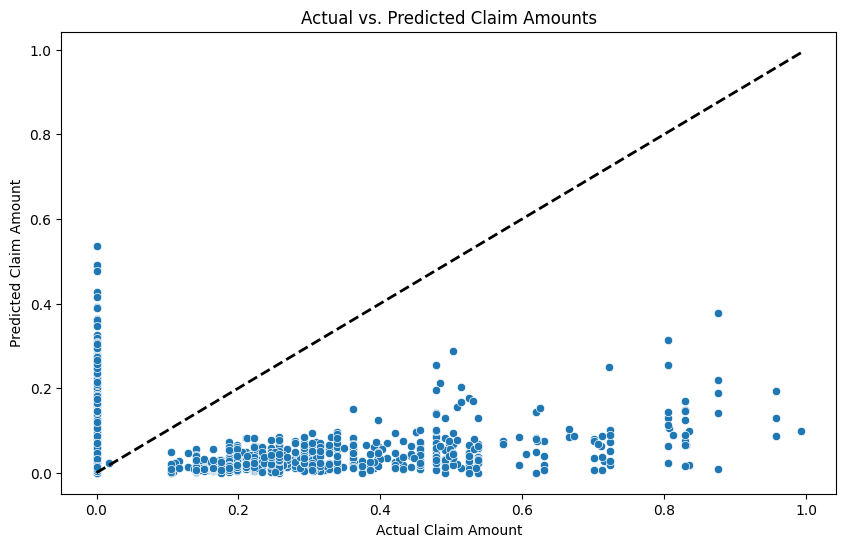

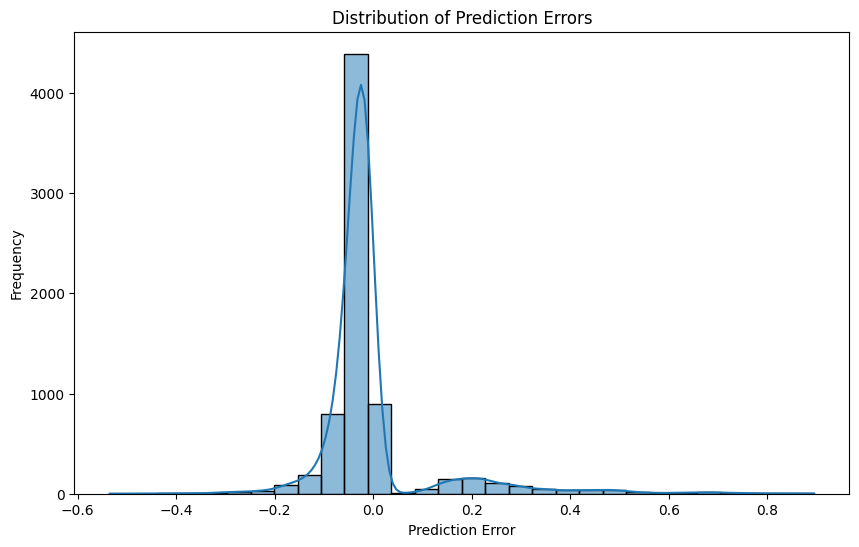

In [158]:


# Define features and target for claim amount forecasting
features = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'year',
            'Gender_Female', 'Gender_Male', 'Transmission_Auto', 'Transmission_Manual',
            'Color_Black', 'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
            'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
            'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
            'City_Riga', 'City_Tukums', 'City_Ventspils']
target = 'Claim amount'

# Split the data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Claim Amount': y_test, 'Predicted Claim Amount': y_pred})

# Save the DataFrame to a CSV file
results_df.to_csv('claim_amount_predictions.csv', index=False)

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Claim Amount', y='Predicted Claim Amount', data=results_df)
plt.plot([results_df['Actual Claim Amount'].min(), results_df['Actual Claim Amount'].max()],
         [results_df['Actual Claim Amount'].min(), results_df['Actual Claim Amount'].max()], 'k--', lw=2)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('Actual vs. Predicted Claim Amounts')
plt.show()

# Calculate prediction error
results_df['Prediction Error'] = results_df['Actual Claim Amount'] - results_df['Predicted Claim Amount']

# Distribution plot of prediction errors
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Prediction Error'], bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


# **ICP: Ideal Customer Profile**
 I have used clustering techniques like K-Means to segment the customers into different groups and then analyzed these groups to identify the ideal customer profile. The elbow method is used to determine the optimal number of clusters. The clusters are analyzed by computing the mean of the features for each cluster. The ICP is identified by selecting the cluster with the highest average 'Price ($)' and 'Annual Income'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

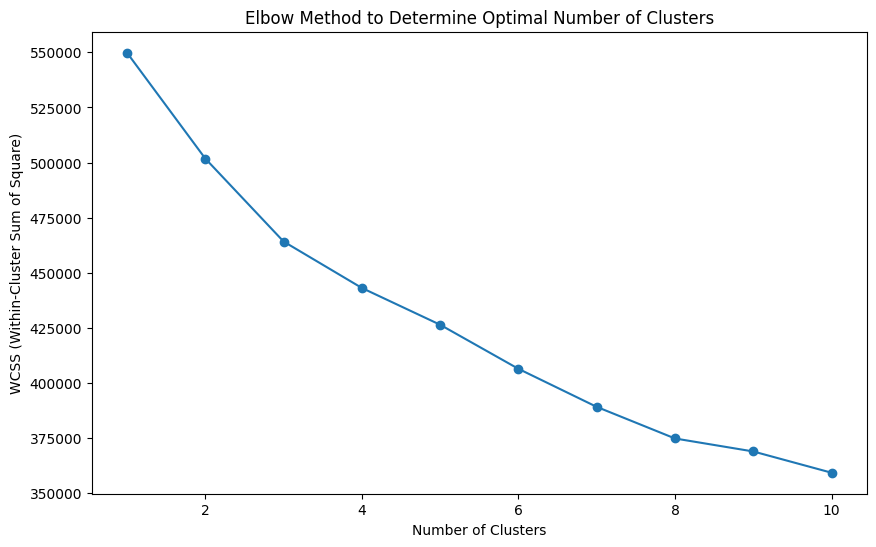

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Annual Income  Price ($)  Amount_paid_for_insurance  Claim amount  \
Cluster                                                                      
0             0.066658   0.320062                   0.335319      0.033169   
1             0.075468   0.320882                   0.335576      0.031577   
2             0.074833   0.313235                   0.328864      0.034472   

                year  Gender_Female  Gender_Male  Transmission_Auto  \
Cluster                                                               
0        2022.582420            1.0          0.0           0.528387   
1        2022.543152            0.0          1.0           1.000000   
2        2022.551647            0.0          1.0           0.000000   

         Transmission_Manual  Color_Black  Color_Pale White  Color_Red  \
Cluster                                                                  
0                   0.471613     0.323610          0.479248   0.197142   
1                   0.000000   

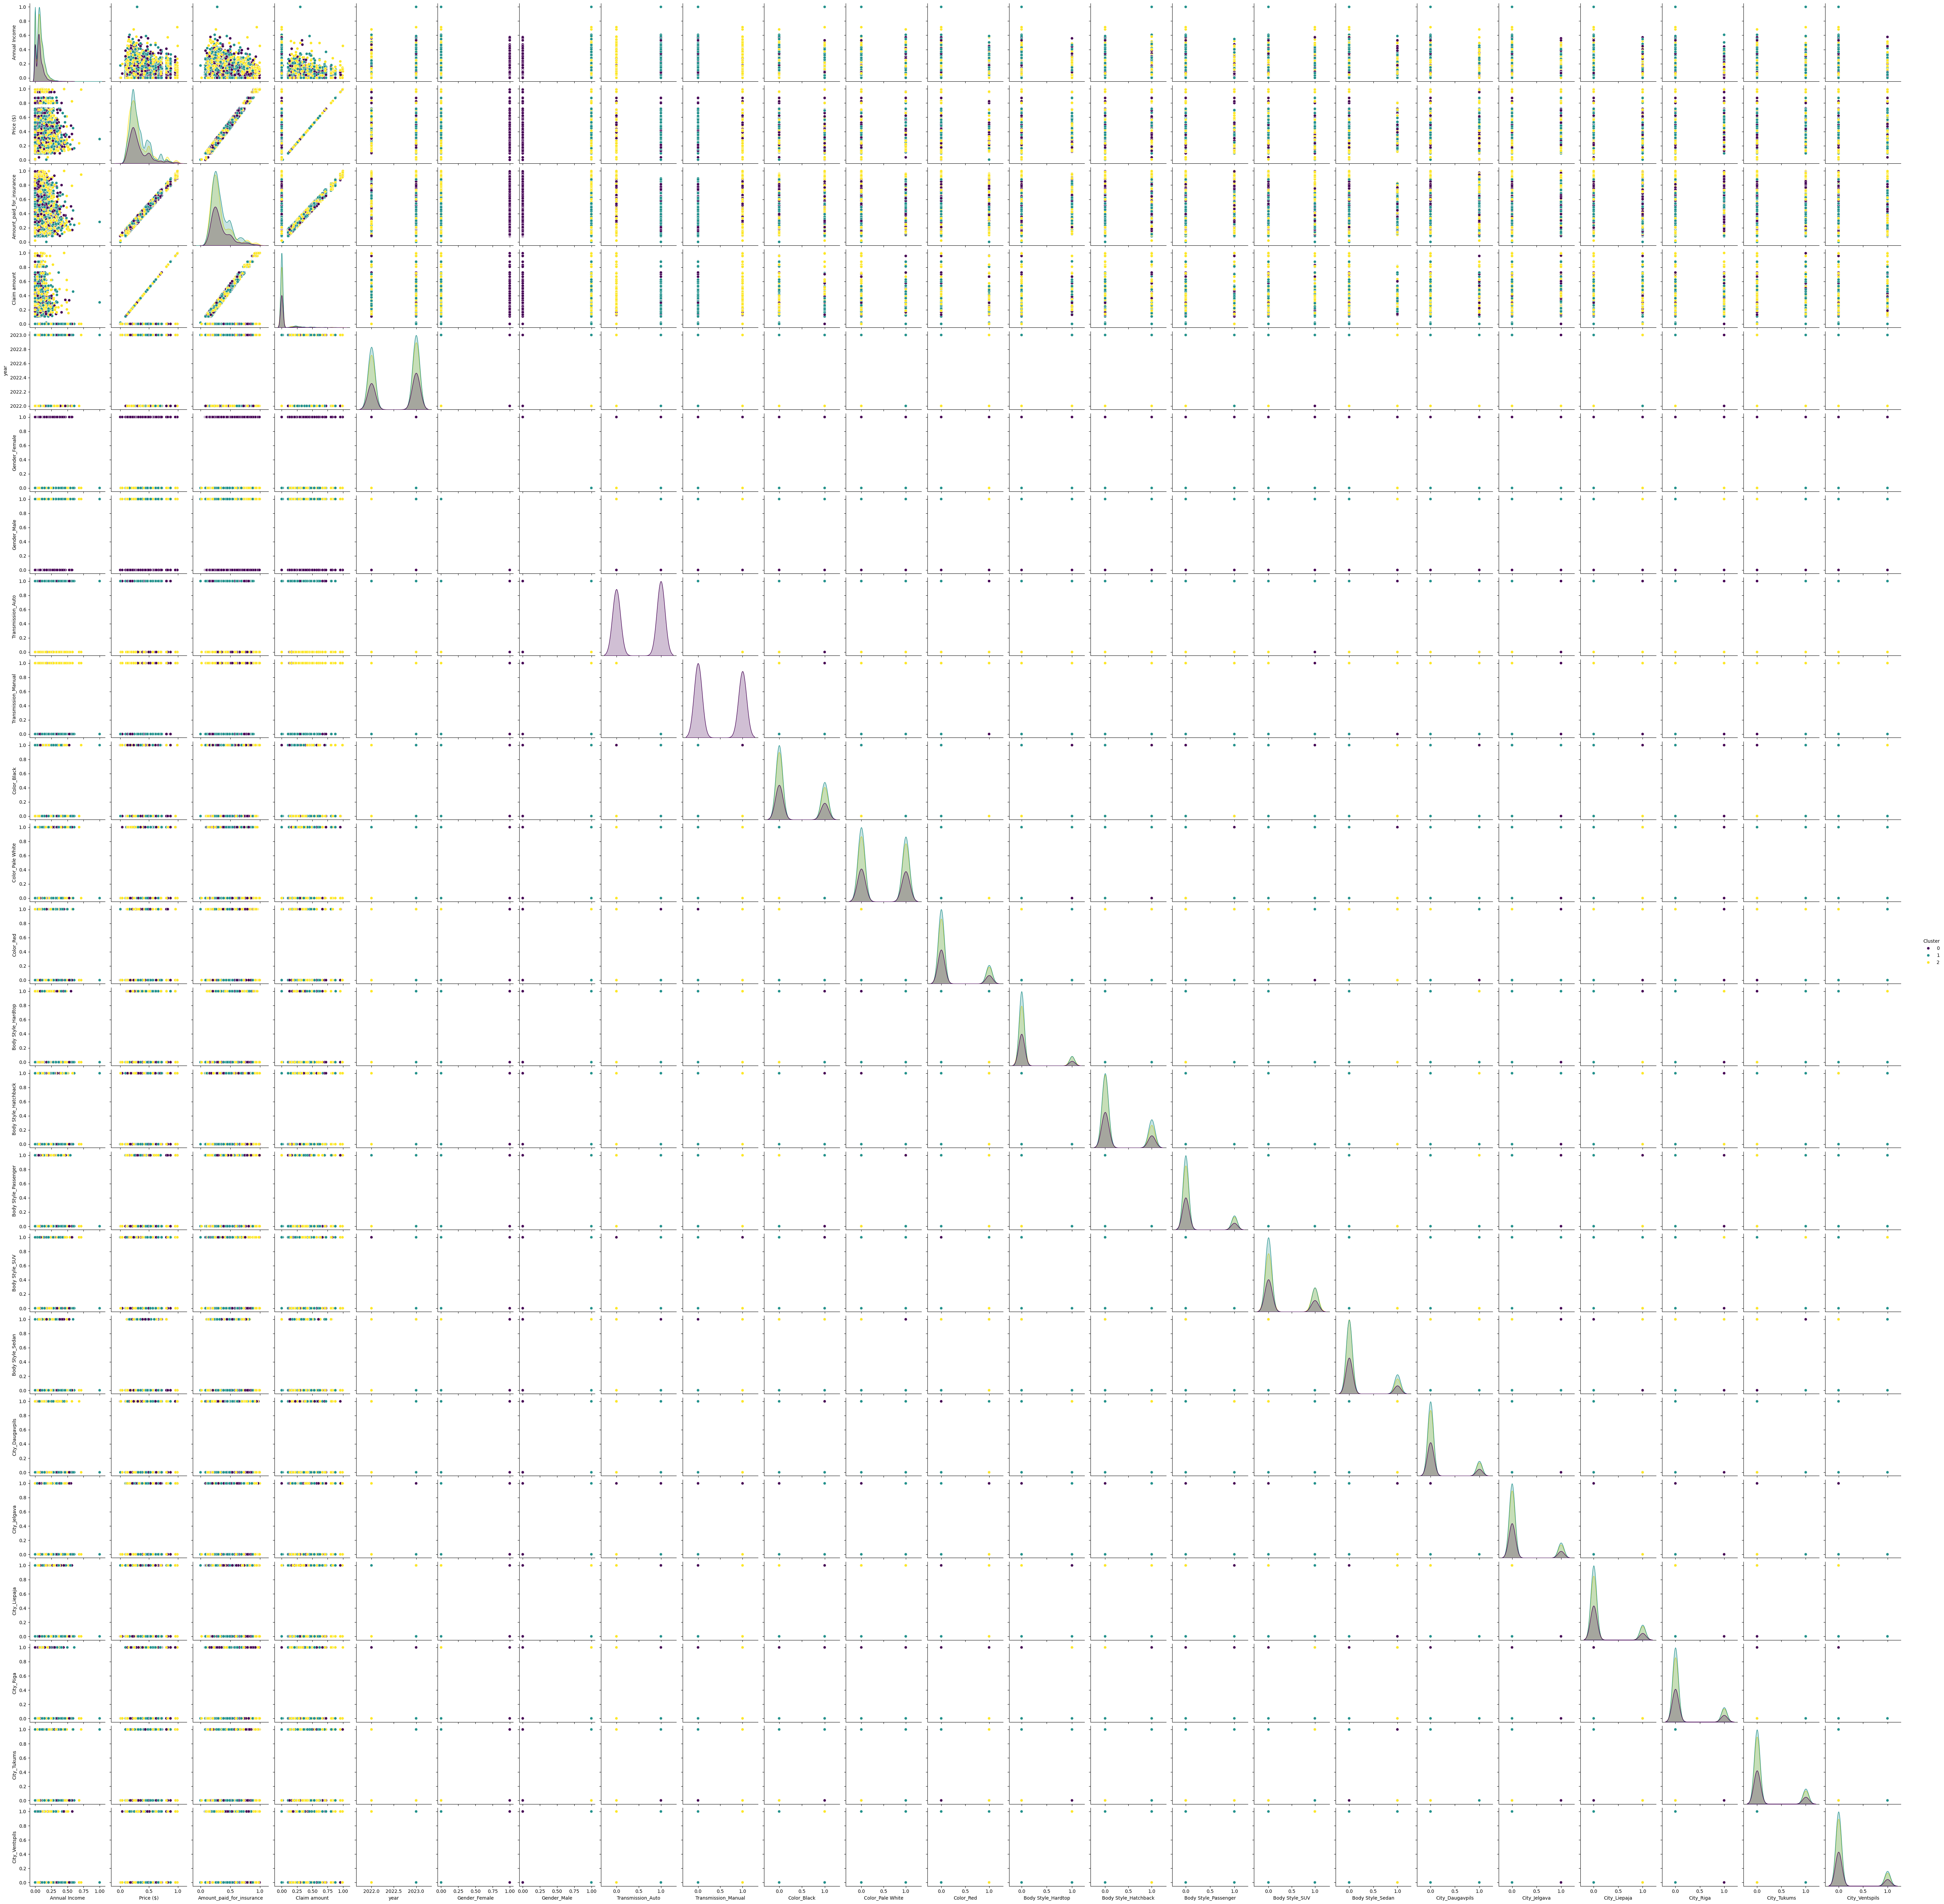

Ideal Customer Profile (ICP):
Annual Income                   0.075468
Price ($)                       0.320882
Amount_paid_for_insurance       0.335576
Claim amount                    0.031577
year                         2022.543152
Gender_Female                   0.000000
Gender_Male                     1.000000
Transmission_Auto               1.000000
Transmission_Manual             0.000000
Color_Black                     0.334887
Color_Pale White                0.466268
Color_Red                       0.198845
Body Style_Hardtop              0.113655
Body Style_Hatchback            0.275020
Body Style_Passenger            0.159340
Body Style_SUV                  0.245340
Body Style_Sedan                0.206645
City_Daugavpils                 0.165316
City_Jelgava                    0.168963
City_Liepaja                    0.167443
City_Riga                       0.162986
City_Tukums                     0.168963
City_Ventspils                  0.166329
Name: 1, dtype: float64


In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Define features for clustering
features = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount', 'year',
            'Gender_Female', 'Gender_Male', 'Transmission_Auto', 'Transmission_Manual',
            'Color_Black', 'Color_Pale White', 'Color_Red', 'Body Style_Hardtop',
            'Body Style_Hatchback', 'Body Style_Passenger', 'Body Style_SUV',
            'Body Style_Sedan', 'City_Daugavpils', 'City_Jelgava', 'City_Liepaja',
            'City_Riga', 'City_Tukums', 'City_Ventspils']

# Standardize the features
data=df2
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

# Apply KMeans clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze the clusters
cluster_profile = data.groupby('Cluster')[features].mean()
print(cluster_profile)

# Add the cluster label back to the original data for further analysis
data['Cluster'] = kmeans.labels_

# Visualize the clusters using a pairplot
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

# Identify the Ideal Customer Profile (ICP)
# Assuming the ideal customer profile has the highest average 'Price ($)' and 'Annual Income'
icp = cluster_profile.loc[cluster_profile['Price ($)'].idxmax()]
print("Ideal Customer Profile (ICP):")
print(icp)


# **Conclusion and Next Steps:**

**Conclusion**: After various forecasting methods and applying ICP we can understand about the future of car prices, the amount that will be paid by the customers, and how much amount will be claimed. This will help us to understand the financial situation of the future and also find the Ideal Customer profile to focus on based on their annual income and car purchase.


**Next Steps**: Analyze ICP Characteristics:

* Further analyze the characteristics of the ICP cluster to understand the profile of ideal customers.
Actionable Insights:

* Use the ICP insights to target similar customers for marketing and sales efforts.